# Diagnosing Heart Disease
Using ML Explainability Tools and Techniques

# Introduction
Of all the applications of machine-learning, diagnosing any serious disease using a black box is always going to be a hard sell. If the output from a model is the particular course of treatment (potentially with side-effects), or surgery, or the absence of treatment, people are going to want to know why.

This dataset gives a number of variables along with a target condition of having or not having heart disease. Below, the data is first used in a simple random forest model, and then the model is investigated using ML explainability tools and techniques.

In [1]:
#Loading appropriate Libraries:
import os
import numpy as np
import pandas as pd # data processing
import matplotlib.pyplot as plt #data visualization
%matplotlib inline
import seaborn as sns #for EDA
from collections import Counter

In [2]:
#Loading Data:
os.chdir('C:\\Users\\Ibney naseem\\Desktop\\Pucho_task\\heart-disease-uci')

In [3]:
heart_data = pd.read_csv('heart.csv')

In [4]:
heart_data.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
age,63.0,37.0,41.0,56.0,57.0,57.0,56.0,44.0,52.0,57.0,54.0
sex,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
cp,3.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0
trestbps,145.0,130.0,130.0,120.0,120.0,140.0,140.0,120.0,172.0,150.0,140.0
chol,233.0,250.0,204.0,236.0,354.0,192.0,294.0,263.0,199.0,168.0,239.0
fbs,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
thalach,150.0,187.0,172.0,178.0,163.0,148.0,153.0,173.0,162.0,174.0,160.0
exang,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
oldpeak,2.3,3.5,1.4,0.8,0.6,0.4,1.3,0.0,0.5,1.6,1.2


# Attribute Information:

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic 10

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 20 ekgmo

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal: thalassemia-- 3 = normal; 6 = fixed defect; 7 = reversable defect

target: 0(no presence) 1(presence)

# Basic Insights:

In [5]:
print('Number of Rows:', heart_data.shape[0])
print('Number of Features:', heart_data.shape[1])

Number of Rows: 303
Number of Features: 14


In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# EDA (Exploratory Data Analysis)
For the purpose of Data Anaysis lets convert the numerical columns to categorical columns for better understanding

In [7]:
heart_data.columns = ['Age', 'Sex',  'Chest_pain_type', 'Resting_blood_pressure', 'Serum_cholestoral(mg/dl)', 'Fasting_blood_sugar(mg/dl)', 'Resting_ECG_results', 'Max_heart_rate'
                    , 'Exercise_induced_angina', 'Oldpeak', 'Slope', 'No.of_major_vessels', 'thalassemia','target']

In [8]:
data_sample = heart_data.copy()

In [9]:
data_sample['Sex'][data_sample['Sex']==1]='Male' 
data_sample['Sex'][data_sample['Sex']==0]='Female'

data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 1] = 'typical angina' 
data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 2] = 'atypical angina' 
data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 3] = 'non-anginal pain' 
data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 4] = 'asymptomatic'

data_sample['Fasting_blood_sugar(mg/dl)'][data_sample['Fasting_blood_sugar(mg/dl)'] == 0] = 'lower than 120mg/ml' 
data_sample['Fasting_blood_sugar(mg/dl)'][data_sample['Fasting_blood_sugar(mg/dl)'] == 1] = 'greater than 120mg/ml'

data_sample['Resting_ECG_results'][data_sample['Resting_ECG_results'] == 0] = 'normal' 
data_sample['Resting_ECG_results'][data_sample['Resting_ECG_results'] == 1] = 'ST-T wave abnormality' 
data_sample['Resting_ECG_results'][data_sample['Resting_ECG_results'] == 2] = 'left ventricular hypertrophy'

data_sample['Exercise_induced_angina'][data_sample['Exercise_induced_angina'] == 0] = 'no' 
data_sample['Exercise_induced_angina'][data_sample['Exercise_induced_angina'] == 1] = 'yes'

data_sample['Slope'][data_sample['Slope'] == 1] = 'upsloping' 
data_sample['Slope'][data_sample['Slope'] == 2] = 'flat' 
data_sample['Slope'][data_sample['Slope'] == 3] = 'downsloping'

data_sample['thalassemia'][data_sample['thalassemia'] == 1] = 'normal' 
data_sample['thalassemia'][data_sample['thalassemia'] == 2] = 'fixed defect' 
data_sample['thalassemia'][data_sample['thalassemia'] == 3] = 'reversable defect'

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users

In [10]:
heart_data.head()

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholestoral(mg/dl),Fasting_blood_sugar(mg/dl),Resting_ECG_results,Max_heart_rate,Exercise_induced_angina,Oldpeak,Slope,No.of_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


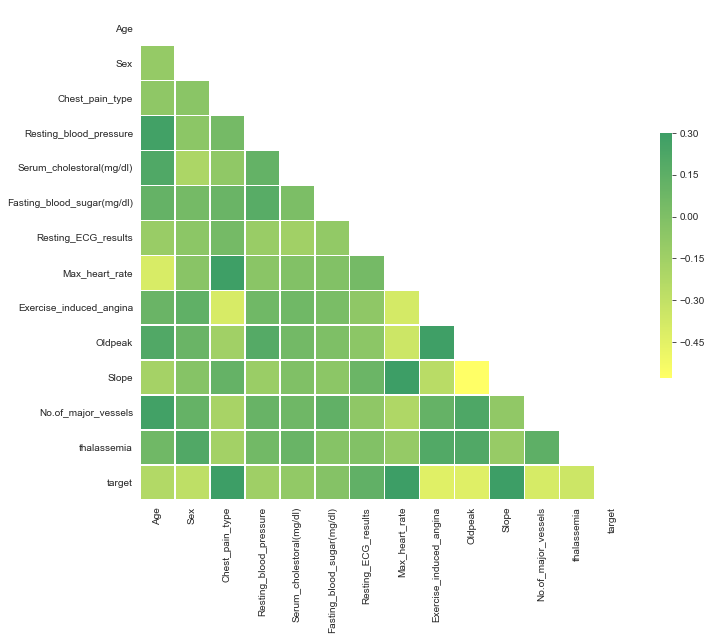

In [111]:
#Cheking correlation:
import seaborn as sns
corr = heart_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,mask=mask,cmap='summer_r',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [112]:
from scipy.cluster import hierarchy as hc

In [115]:
def hierarchy_tree(heart_data):
    corr = np.round(scipy.stats.spearmanr(heart_data).correlation, 4)
    corr_condensed = hc.distance.squareform(1-heart_data.corr())
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=(16,10))
    dendrogram = hc.dendrogram(z, labels=heart_data.columns, orientation='left', leaf_font_size=16)
    plt.show()

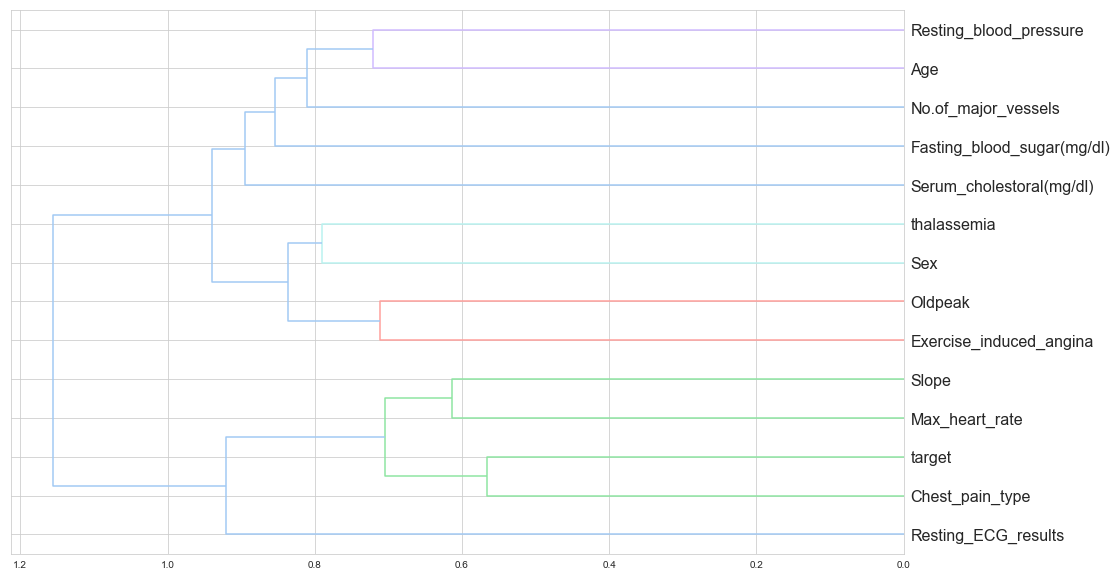

In [119]:
import scipy
hierarchy_tree(heart_data)

#  1. Distribution Of target

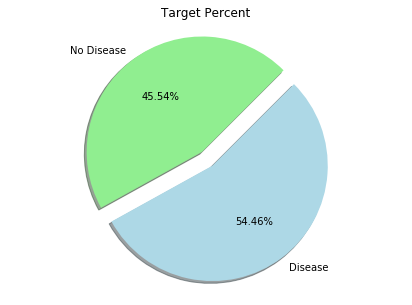

In [11]:
def plot1():
  plt.figure(figsize=(7, 5))
  target_count = [len(data_sample[data_sample['target'] == 0]),len(data_sample[data_sample['target'] == 1])]
  labels = ['No Disease', 'Disease']
  colors = ['lightgreen', 'lightblue']
  explode = (0.05, 0.1)
  plt.pie(target_count, explode=explode, labels=labels, 
        colors=colors,autopct='%4.2f%%',shadow=True, startangle=45)
  plt.title('Target Percent')
  plt.axis('equal')
  plt.show()  
plot1()

# 2. Distribution of Sex

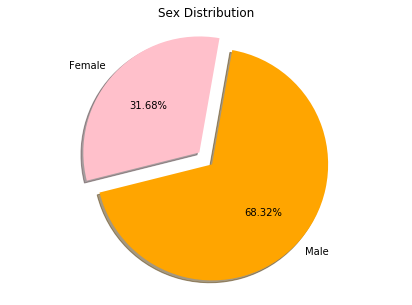

In [12]:
def plot2():
  plt.figure(figsize=(7, 5))
  sex_count = [len(data_sample[data_sample['Sex'] == 'Female']),len(data_sample[data_sample['Sex'] == 'Male'])]
  labels = ['Female', 'Male']
  colors = ['pink', 'orange']
  explode = (0.05, 0.1)
  plt.pie(sex_count, explode=explode, labels=labels, 
        colors=colors,autopct='%4.2f%%',shadow=True, startangle=80)
  plt.title('Sex Distribution')
  plt.axis('equal')
  plt.show()
  
plot2()

In [13]:
data_sample.Sex.value_counts()

Male      207
Female     96
Name: Sex, dtype: int64

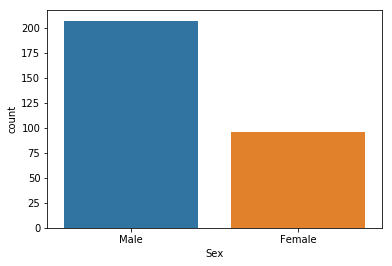

In [14]:
#Sex (1 = male; 0 = female)
sns.countplot(data_sample.Sex)
plt.show()

Male Population is higher... Therefore Males are more likely to turn up diagnosis.

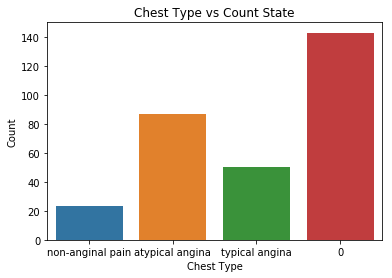

In [15]:
sns.countplot(data_sample.Chest_pain_type)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

# 3. Age Distribution 

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


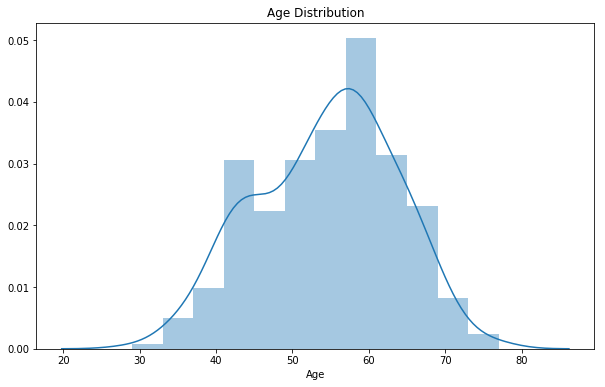

In [16]:
def plot3():
    plt.figure(figsize=(10,6))
    sns.distplot(data_sample['Age'])
    plt.title('Age Distribution')
    plt.show()
plot3() 

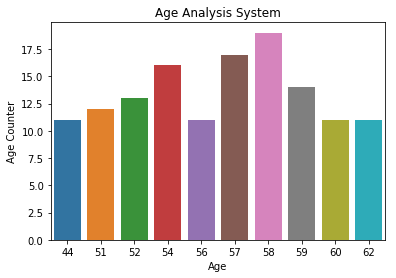

In [17]:
sns.barplot(x=data_sample.Age.value_counts()[:10].index,y=data_sample.Age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

In [18]:
#firstly find min and max ages
minAge=min(data_sample.Age)
maxAge=max(data_sample.Age)
meanAge=data_sample.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [19]:
young_ages=data_sample[(data_sample.Age>=29)&(data_sample.Age<40)]
middle_ages=data_sample[(data_sample.Age>=40)&(data_sample.Age<55)]
elderly_ages=data_sample[(data_sample.Age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


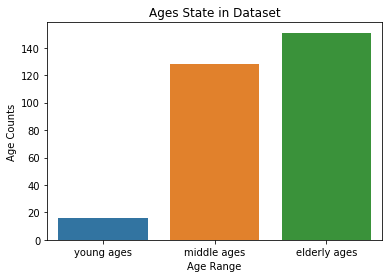

In [20]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

In [21]:
data_sample['AgeRange']=0
youngAge_index=data_sample[(data_sample.Age>=29)&(data_sample.Age<40)].index
middleAge_index=data_sample[(data_sample.Age>=40)&(data_sample.Age<55)].index
elderlyAge_index=data_sample[(data_sample.Age>55)].index

In [22]:
for index in elderlyAge_index:
    data_sample.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    data_sample.loc[index,'AgeRange']=1

for index in youngAge_index:
    data_sample.loc[index,'AgeRange']=0

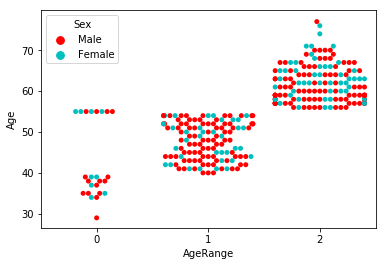

In [23]:
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="AgeRange", y="Age",hue='Sex',
              palette=["r", "c", "y"], data=data_sample)
plt.show()

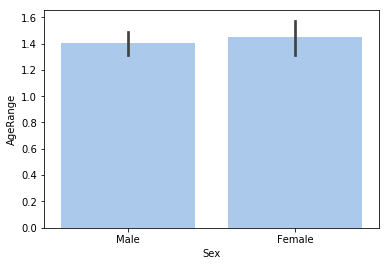

In [24]:
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y="AgeRange", x="Sex", data=data_sample,
            label="Total", color="b")
plt.show()

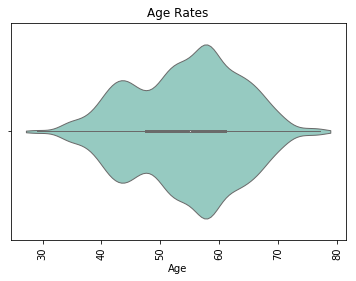

In [25]:
sns.violinplot(data_sample.Age, palette="Set3", bw=.2, cut=1, linewidth=1)
plt.xticks(rotation=90)
plt.title("Age Rates")
plt.show()

In [26]:
target_0_agerang_0=len(data_sample[(data_sample.target==0)&(data_sample.AgeRange==0)])
target_1_agerang_0=len(data_sample[(data_sample.target==1)&(data_sample.AgeRange==0)])

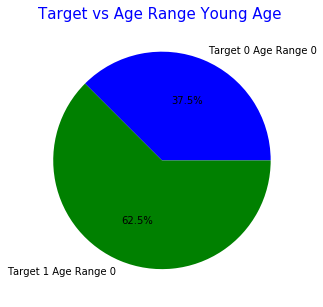

In [27]:
colors = ['blue','green']
explode = [0,0]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Young Age ',color = 'blue',fontsize = 15)
plt.show()

In [28]:
target_0_agerang_1=len(data_sample[(data_sample.target==0)&(data_sample.AgeRange==1)])
target_1_agerang_1=len(data_sample[(data_sample.target==1)&(data_sample.AgeRange==1)])

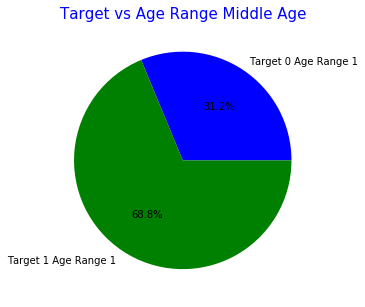

In [29]:
colors = ['blue','green']
explode = [0,0]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_1,target_1_agerang_1], explode=explode, labels=['Target 0 Age Range 1','Target 1 Age Range 1'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Middle Age',color = 'blue',fontsize = 15)
plt.show()

In [30]:
target_0_agerang_2=len(data_sample[(data_sample.target==0)&(data_sample.AgeRange==2)])
target_1_agerang_2=len(data_sample[(data_sample.target==1)&(data_sample.AgeRange==2)])

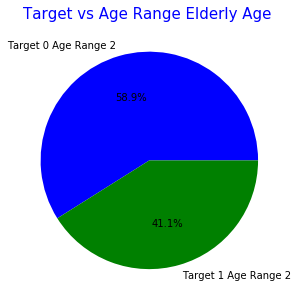

In [31]:
colors = ['blue','green']
explode = [0,0]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_2,target_1_agerang_2], explode=explode, labels=['Target 0 Age Range 2','Target 1 Age Range 2'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Elderly Age ',color = 'blue',fontsize = 15)
plt.show()

# 4. Sex Type and Age vs Heart Disease

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


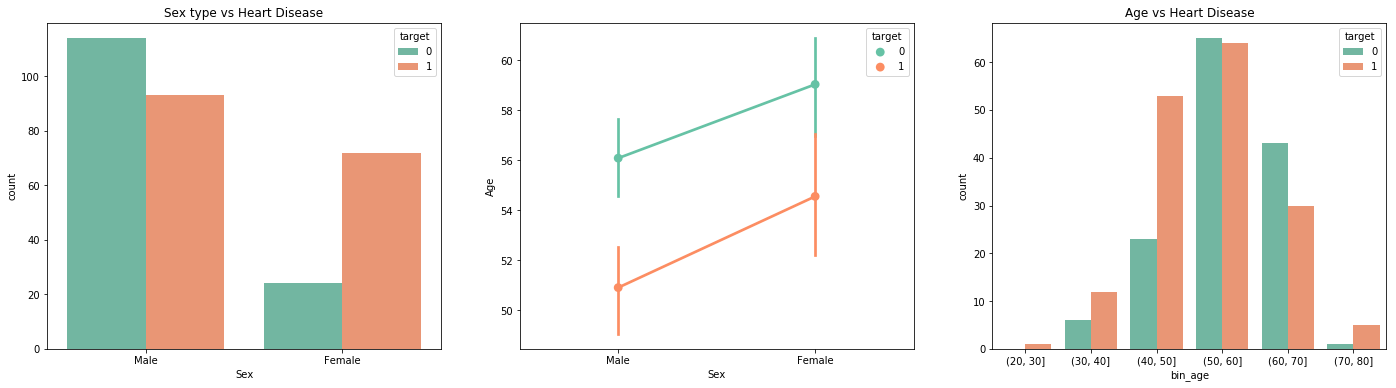

In [32]:
def plot4():
 
    plt.figure(figsize=(24,6))
  
    age_bins = [20,30,40,50,60,70,80]
    data_sample['bin_age'] = pd.cut(data_sample['Age'], bins=age_bins)
  
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Sex', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Sex type vs Heart Disease')
    
    plt.subplot(1,3,2)
    p2 = sns.pointplot(x='Sex', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Sex type vs Heart Disease')
        
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='bin_age', data=data_sample, hue='target', palette='Set2')
    p3.set_title('Age vs Heart Disease')
    
plot4()

# Insights in Sex Type and Age vs Heart Disease:

Figure1 shows that Male are more likely to get heart disease

Figure 2 shows that mean age for female with heart disease is 54 and male with heart disease is 51

Figure 3 shows Ages between 40 to 70 are more likely to have heart disease

# 5. Atrributes asscicated with showing heart disease - 1

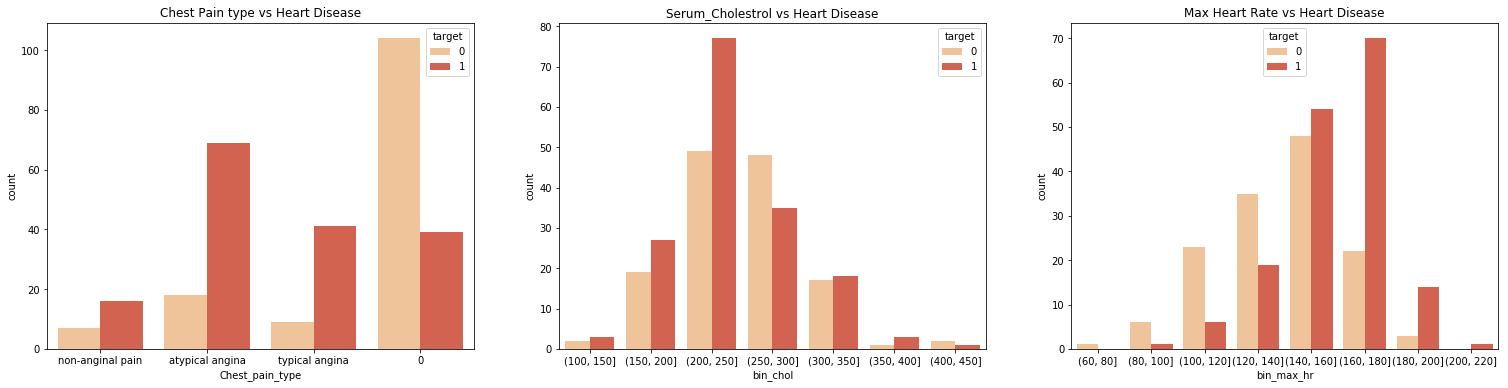

In [33]:
def plot5():
  
    plt.figure(figsize=(26,6))
    chol_bins = [100,150,200,250,300,350,400,450]
    max_hr_bins = [60,80,100,120,140,160,180,200,220]
    
    data_sample['bin_chol'] = pd.cut(data_sample['Serum_cholestoral(mg/dl)'], bins=chol_bins)
    data_sample['bin_max_hr'] = pd.cut(data_sample['Max_heart_rate'], bins=max_hr_bins)
    
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Chest_pain_type', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Chest Pain type vs Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.countplot(x='bin_chol', data=data_sample, hue='target', palette='OrRd')
    p2.set_title('Serum_Cholestrol vs Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='bin_max_hr', data=data_sample, hue='target', palette='OrRd')
    p3.set_title('Max Heart Rate vs Heart Disease')
    
plot5()

# Insights of Atrributes associated with showing heart disease - 1:

Figure 1 : Shows atypical angina chest pain resulted in more heart disease

Figure 2 : ShowsCholestrol Range of 200 - 300 have resulted in heart disease

Figure 3 : Shows Max Heart rate between 140 to 180 have resulted in heart disease

# 6. Atrributes asscicated with showing heart disease - 2

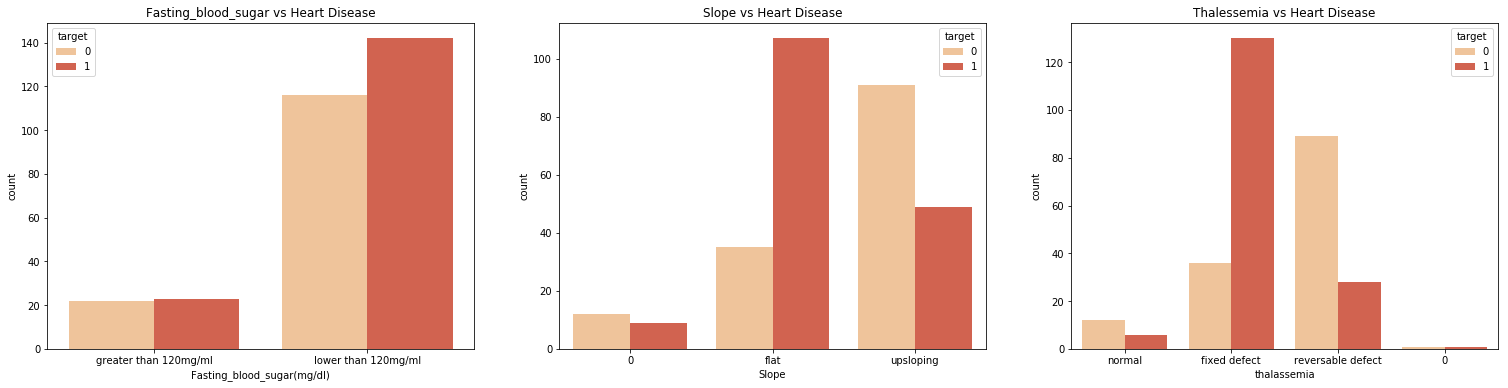

In [34]:
def plot6():
    plt.figure(figsize=(26,6))
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Fasting_blood_sugar(mg/dl)', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Fasting_blood_sugar vs Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.countplot(x='Slope', data=data_sample, hue='target', palette='OrRd')
    p2.set_title('Slope vs Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='thalassemia', data=data_sample, hue='target', palette='OrRd')
    p3.set_title('Thalessemia vs Heart Disease')
plot6()

# Insights Atrributes asscicated with showing heart disease - 2:

Figure 1 : Shows Blood Sugar level lower than 120mg/ml has resulted in more heart disease

Figure 2 : Shows Slope type of flat have resulted in heart disease

Figure 3 : Shows thalassemai type of fixed defect have resulted in heart disease

# 7. Atrributes asscicated with showing heart disease - 3

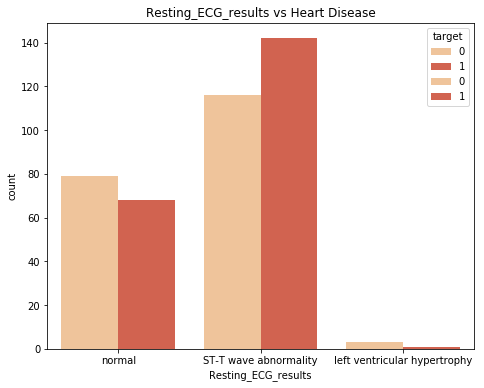

In [35]:
def plot7():
    plt.figure(figsize=(26,6))
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Fasting_blood_sugar(mg/dl)', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Fasting_blood_sugar vs Heart Disease')
         
  
    p1 = sns.countplot(x='Resting_ECG_results', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Resting_ECG_results vs Heart Disease')
    
plot7()

# 8. Atrributes asscicated with ages vs heart disease - 1

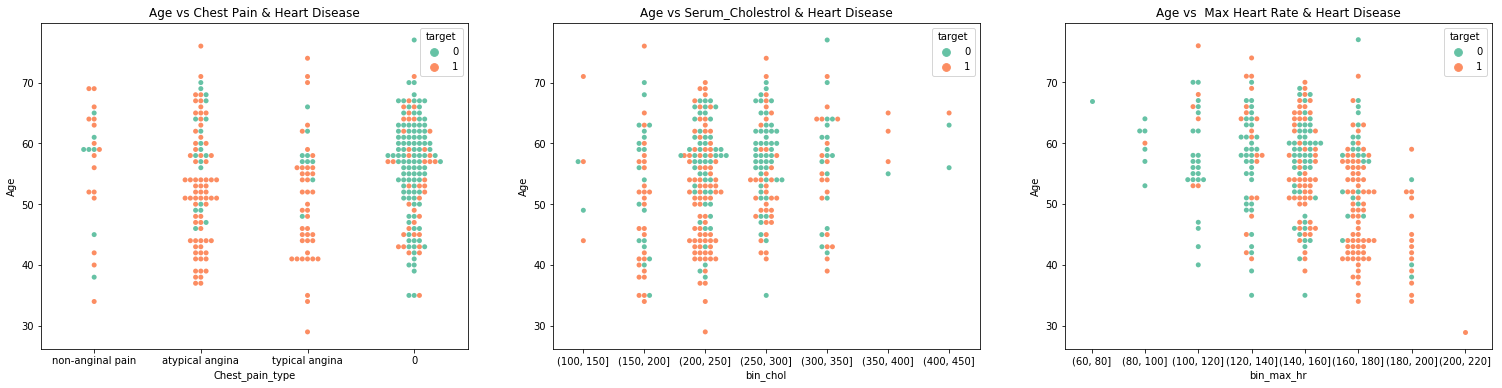

In [36]:
def plot8():
    plt.figure(figsize=(26,6))
    
    plt.subplot(1,3,1)
    p1 = sns.swarmplot(x='Chest_pain_type', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Age vs Chest Pain & Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.swarmplot(x='bin_chol', y='Age', data=data_sample, hue='target', palette='Set2')
    p2.set_title('Age vs Serum_Cholestrol & Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.swarmplot(x='bin_max_hr',y='Age', data=data_sample, hue='target', palette='Set2')
    p3.set_title('Age vs  Max Heart Rate & Heart Disease')
plot8()

# Insights of Atrributes asscicated with ages vs heart disease - 1:

Figure 1 : Important note here - Chest pain type makes an important factor for having heart disesese because most of the cases with target 1 have chest pain

Figure 2 : Cholestrol level 200-250 is more among the age range 40 - 60

Figure 3 : Max heart rate between 160-180 that have led to heart disease are more likely to occur for age group of 40-50

# 9. Atrributes asscicated with ages vs heart disease - 2

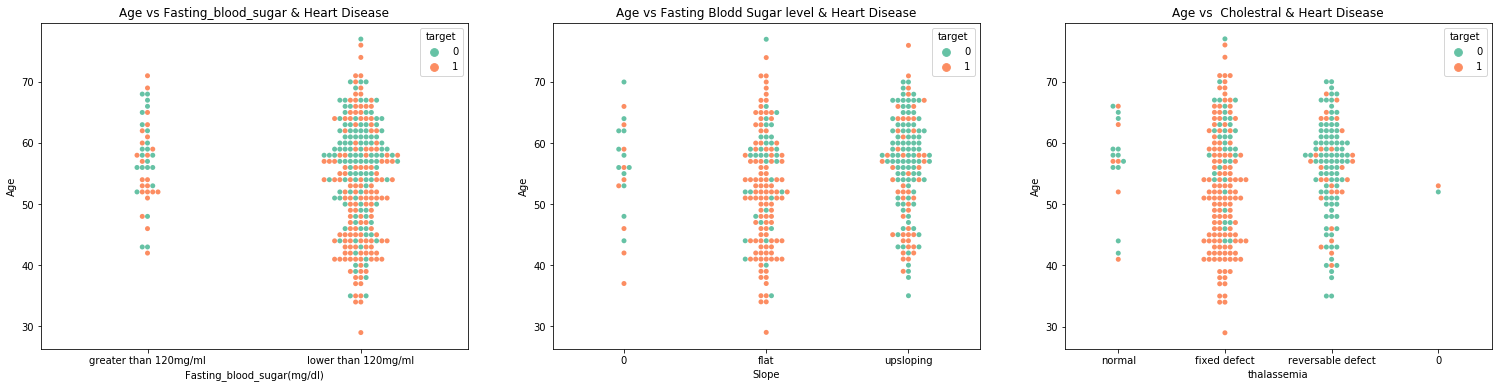

In [37]:
def plot9():
    plt.figure(figsize=(26,6))
    
    plt.subplot(1,3,1)
    p1 = sns.swarmplot(x='Fasting_blood_sugar(mg/dl)', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Age vs Fasting_blood_sugar & Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.swarmplot(x='Slope', y='Age', data=data_sample, hue='target', palette='Set2')
    p2.set_title('Age vs Fasting Blodd Sugar level & Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.swarmplot(x='thalassemia',y='Age', data=data_sample, hue='target', palette='Set2')
    p3.set_title('Age vs  Cholestral & Heart Disease')
plot9()

# Insights of Atrributes asscicated with ages vs heart disease - 2:

Figure 1 : Important note here - Most of our observation shows Blood sugar level lower than 120mg/ml

Figure 2 : Distribution of slope type with ages

Figure 3 : Important note here - Thalassemia type of fixed defect that have led to heart disease are more likely to occur for age group of 40-55

# 10. Atrributes asscicated with ages vs heart disease - 3

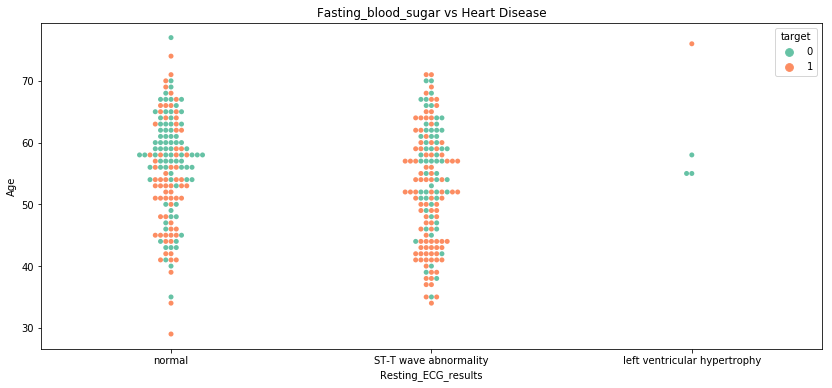

In [38]:
  def plot10():
    plt.figure(figsize=(14,6))
    p1 = sns.swarmplot(x='Resting_ECG_results', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Fasting_blood_sugar vs Heart Disease')           
plot10()

# Max_heart_rate Analysis:
The analysis of the system we discussed in the case of maximum heart rate is shown

Text(0.5, 1.0, 'Most common ages of heart patients')

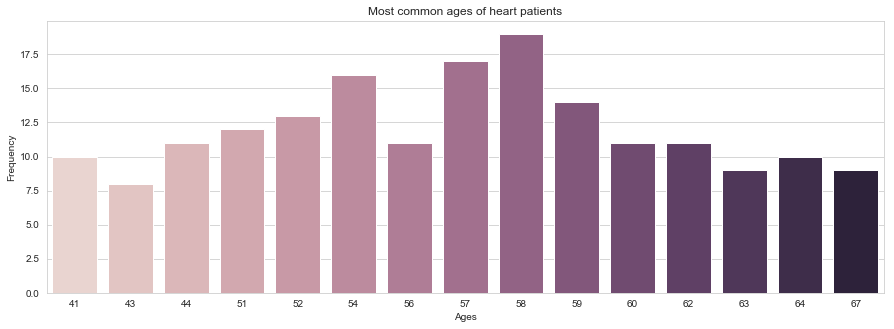

In [121]:
# Which age range is more likely to be a heart patient?
age_list= list(data_sample.Age)
# I am gonna use 'Counter' method. We should import it at the beginning.
age_count= Counter(age_list)
most_common_age= age_count.most_common(15)
x,y = zip(*most_common_age)
x,y = list(x), list(y)

#Visualization
plt.figure(figsize=(15,5))
sns.barplot(x=x, y=y, palette= sns.cubehelix_palette(len(x)))
plt.ylabel('Frequency')
plt.xlabel('Ages')
plt.title('Most common ages of heart patients')

In [39]:
data_sample.Max_heart_rate.value_counts()[:20]
#First show 20 rows

162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
144     7
156     6
169     6
158     6
140     6
142     6
178     5
161     5
154     5
165     5
Name: Max_heart_rate, dtype: int64

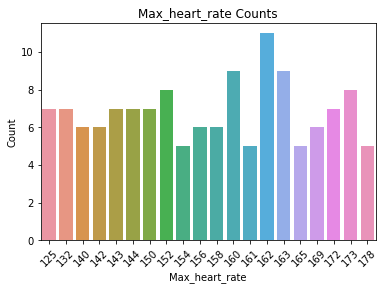

In [40]:
sns.barplot(x=data_sample.Max_heart_rate.value_counts()[:20].index,y=data_sample.Max_heart_rate.value_counts()[:20].values)
plt.xlabel('Max_heart_rate')
plt.ylabel('Count')
plt.title('Max_heart_rate Counts')
plt.xticks(rotation=45)
plt.show()

In the analysis system, which will be carried out now, an analysis shall be carried out for all persons or their status in the target process.

In [41]:
age_unique=sorted(data_sample.Age.unique())
age_Max_heart_rate_values=data_sample.groupby('Age')['Max_heart_rate'].count().values
mean_Max_heart_rate=[]
for i,age in enumerate(age_unique):
    mean_Max_heart_rate.append(sum(data_sample[data_sample['Age']==age].Max_heart_rate)/age_Max_heart_rate_values[i])

The transactions we perform in this section mean an average age. In this part, taking the average of all transactions is performed.

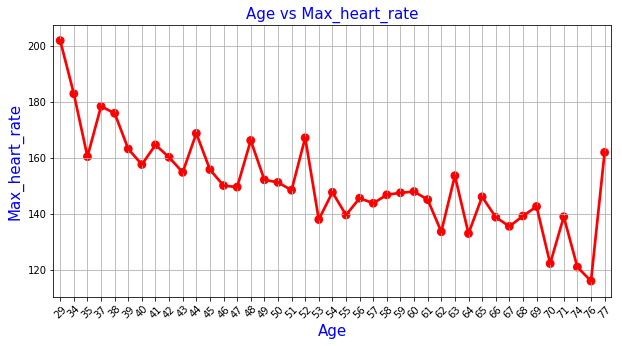

In [42]:
#data_sorted=data.sort_values(by='Age',ascending=True)
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_Max_heart_rate,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Max_heart_rate',fontsize = 15,color='blue')
plt.title('Age vs Max_heart_rate',fontsize = 15,color='blue')
plt.grid()
plt.show()

In this section we will use the groupby function. Our aim here is to obtain the average values of Max_heart_rate according to age ranges. Because we're going to do chest pain.

In [43]:
age_range_Max_heart_rate=data_sample.groupby('AgeRange')['Max_heart_rate'].mean()

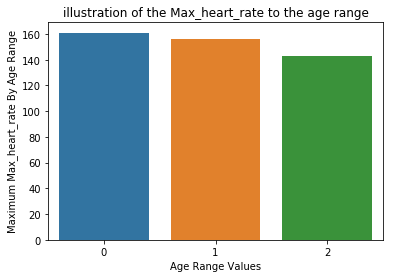

In [44]:
sns.barplot(x=age_range_Max_heart_rate.index,y=age_range_Max_heart_rate.values)
plt.xlabel('Age Range Values')
plt.ylabel('Maximum Max_heart_rate By Age Range')
plt.title('illustration of the Max_heart_rate to the age range')
plt.show()
#As shown in this graph, this rate decreases as the heart rate 
#is faster and in old age areas.

In [45]:
data_sample.thalassemia.value_counts()

fixed defect         166
reversable defect    117
normal                18
0                      2
Name: thalassemia, dtype: int64

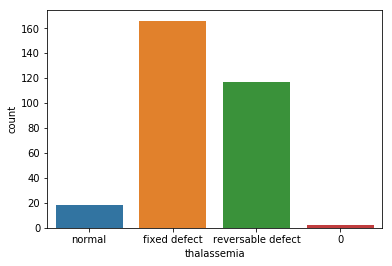

In [46]:
sns.countplot(data_sample.thalassemia)
plt.show()

According to the analysis,thalaseemia values are observed. Of these values, 0 is only 2. Normal showed a distribution of 18. In order to better understand this distribution, we need to take a look at the data set.

In [47]:
#determine the age ranges of patients with and without sickness and make analyzes about them
age_counter_target_1=[]
age_counter_target_0=[]
for age in data_sample.Age.unique():
    age_counter_target_1.append(len(data_sample[(data_sample['Age']==age)&(data_sample.target==1)]))
    age_counter_target_0.append(len(data_sample[(data_sample['Age']==age)&(data_sample.target==0)]))

#now, draw show on graph  

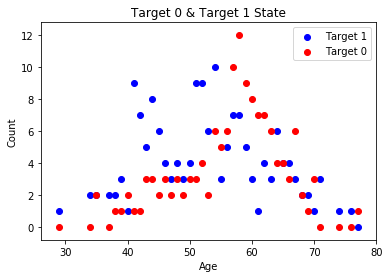

In [48]:
#Target 1 & 0 show graph on scatter
plt.scatter(x=data_sample.Age.unique(),y=age_counter_target_1,color='blue',label='Target 1')
plt.scatter(x=data_sample.Age.unique(),y=age_counter_target_0,color='red',label='Target 0')
plt.legend(loc='upper right',frameon=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Target 0 & Target 1 State')
plt.show()

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


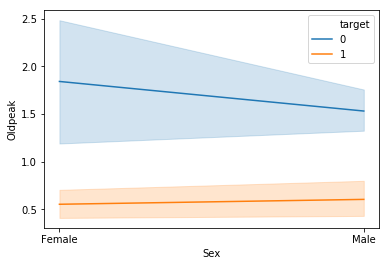

In [49]:
sns.lineplot(x="Sex", y="Oldpeak",
             hue="target",data=data_sample)
plt.show()

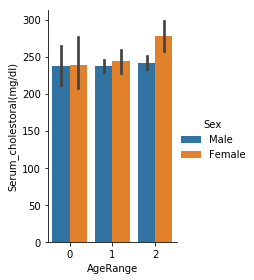

In [50]:
g = sns.catplot(x="AgeRange", y="Serum_cholestoral(mg/dl)",
                 hue="Sex",
                 data=data_sample, kind="bar",
                 height=4, aspect=.7)
plt.show()

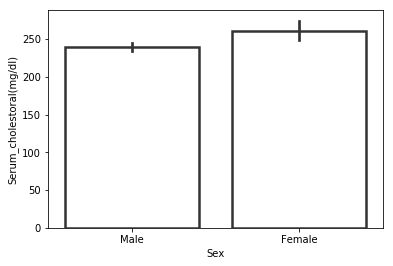

In [51]:
ax = sns.barplot("Sex", "Serum_cholestoral(mg/dl)", data=data_sample,
                  linewidth=2.5, facecolor=(1, 1, 1, 0),
                  errcolor=".2", edgecolor=".2")
plt.show()

Text(0.5, 1.0, 'Chest_pain_type according in heart.csv')

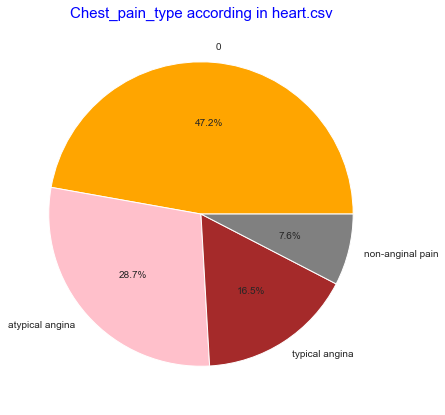

In [122]:
#I want to learn Chest_pain_type according in heart data.
labels= data_sample.Chest_pain_type.value_counts().index
colors=["orange","pink","brown","gray"]
explode= [0,0,0,0]
sizes=data_sample.Chest_pain_type.value_counts().values
#Visualization with pie plot
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Chest_pain_type according in heart.csv',color="blue",fontsize=15)

# MODEL, TRAINING and TESTING:
# Applying Machine Learning Models:

As is known, most of our data are categorized and not categorized only among certain feature values. We will perform scale operations to eliminate these situations. There are many scale operations for this. These are as follows.

Z-score

Normalization

In [52]:
#Let's see how the correlation values between them
data_sample.corr()

,Age,Resting_blood_pressure,Serum_cholestoral(mg/dl),Max_heart_rate,Oldpeak,No.of_major_vessels,target,AgeRange
Age,1.000000,0.279351,0.213678,-0.398522,0.210013,0.276326,-0.225439,0.808707
Resting_blood_pressure,0.279351,1.000000,0.123174,-0.046698,0.193216,0.101389,-0.144931,0.214313
Serum_cholestoral(mg/dl),0.213678,0.123174,1.000000,-0.009940,0.053952,0.070511,-0.085239,0.138688
Max_heart_rate,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.213177,0.421741,-0.306015
Oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.222682,-0.430696,0.155264
No.of_major_vessels,0.276326,0.101389,0.070511,-0.213177,0.222682,1.000000,-0.391724,0.231358
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,-0.391724,1.000000,-0.231638
AgeRange,0.808707,0.214313,0.138688,-0.306015,0.155264,0.231358,-0.231638,1.000000


All correlation values between the data_sample are listed in the previous sections. As a result of this listing, it is aimed to ensure that these properties are used in different places by performing different operations. Thus, the p-value process determines a hypothesis and a hypothesis thesis is presented between each characteristic according to this hypothesis. In this process, after determining the Class property as hypothesis, the relations between all the other properties are checked. This results in a different number for each property. What is important here is that these numbers are not close to 1.00. If the number is close to 1.00 this is very bad.

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [54]:
X = heart_data.loc[:, heart_data.columns!='target']
X.head()

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholestoral(mg/dl),Fasting_blood_sugar(mg/dl),Resting_ECG_results,Max_heart_rate,Exercise_induced_angina,Oldpeak,Slope,No.of_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [55]:
y = heart_data.loc[:, heart_data.columns=='target']
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.30, stratify=y )

In [57]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (212, 13)
X_test (91, 13)
y_train (212, 1)
y_test (91, 1)


The difference in value between our data is too big. It increases both the volume and the results are very bad. To reduce this situation we need to use the StandardScaler function. A value of -1 to 1 will be obtained after using it.

# Random Forest Classifier:

In [58]:
rfc = RandomForestClassifier(n_estimators=1000,min_samples_split=6,
                                              criterion='gini', 
                                              max_features='auto',
                                              oob_score=True,
                                              random_state=1,
                                              n_jobs=-1)
gr = rfc.fit(X_train,y_train)
print('Random Forest Classifier Train Score:',rfc.score(X_train,y_train))
print('Random Forest Classifier Test Score:',rfc.score(X_test,y_test))

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Random Forest Classifier Train Score: 0.9716981132075472
Random Forest Classifier Test Score: 0.8351648351648352


In [59]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

In [60]:
#predicting on train and test data
y_rf_pred_test = rfc.predict(X_test)
y_rf_pred_train = rfc.predict(X_train)
print(classification_report(y_train, y_rf_pred_train))
print(classification_report(y_test, y_rf_pred_test))
print(accuracy_score(y_test, y_rf_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        97
           1       0.97      0.97      0.97       115

   micro avg       0.97      0.97      0.97       212
   macro avg       0.97      0.97      0.97       212
weighted avg       0.97      0.97      0.97       212

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

   micro avg       0.84      0.84      0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

0.8351648351648352


[[34  7]
 [ 8 42]]


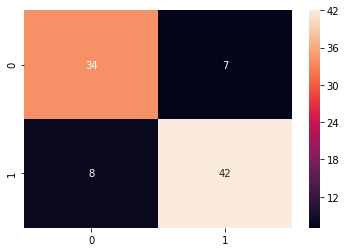

In [61]:
cm=confusion_matrix(y_test,y_rf_pred_test)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

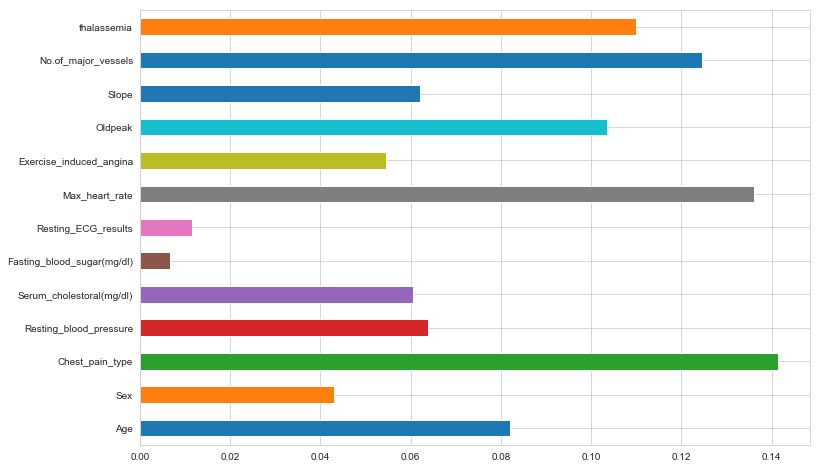

In [108]:
importances_rfc=pd.Series(rfc.feature_importances_, index=X_train.columns)
importances_rfc.plot(kind='barh', figsize=(12,8))

In [63]:
##Checking recall:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_rf_pred_test,pos_label=1,average='binary'))

0.84


# Lets Check Receiver Operator Curve (ROC)

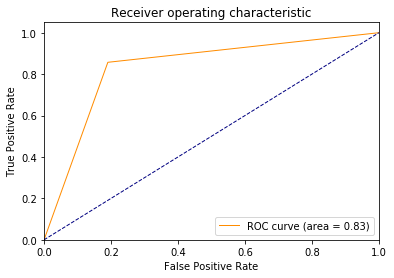

In [64]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_rf_pred_test,y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [66]:
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

[7.47821765e-01 1.51386901e-01 8.29606064e-02 1.65667591e-02
 4.20396655e-04 2.69477828e-04 2.38981033e-04 9.47711463e-05
 7.02349934e-05 5.54176913e-05 5.02716204e-05 3.51816259e-05
 2.92360973e-05]

['Age', 'Sex', 'Chest_pain_type', 'Resting_blood_pressure', 'Serum_cholestoral(mg/dl)', 'Fasting_blood_sugar(mg/dl)', 'Resting_ECG_results', 'Max_heart_rate', 'Exercise_induced_angina', 'Oldpeak', 'Slope', 'No.of_major_vessels', 'thalassemia']
[[ 4.20250149e-02 -1.71934993e-03 -1.37898366e-03  4.42433272e-02
   9.97978912e-01  1.70388245e-04 -1.41821638e-03 -1.74221202e-02
   1.12803192e-03  1.05847867e-03 -3.14160954e-04  5.67626174e-04
   1.12938508e-03]
 [ 1.83227840e-01  8.61704631e-04 -1.02494475e-02  5.47782273e-02
  -2.73192207e-02  6.62262554e-05 -2.90140459e-05 -9.80823513e-01
   7.26645678e-03  1.77444721e-02 -9.90603314e-03  8.88186012e-03
   3.91365223e-03]
 [ 1.39220507e-01 -1.54604413e-03  3.45283207e-03  9.85520266e-01
  -4.81311341e-02  5.04336022e-03 -1.63208489e-03  8.26

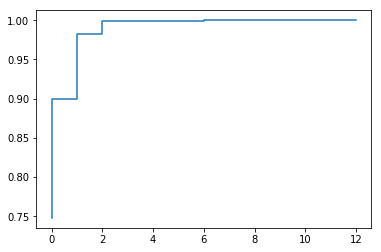

In [67]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

So, I will apply PCA to the data with number of components = 8.

The reduced data can be seen on the plotting below.


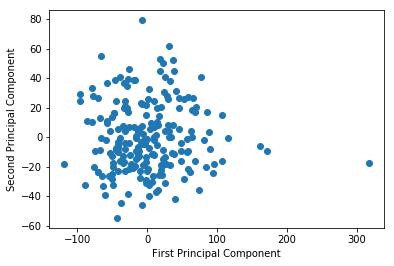

In [68]:
pca = PCA(n_components=8)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

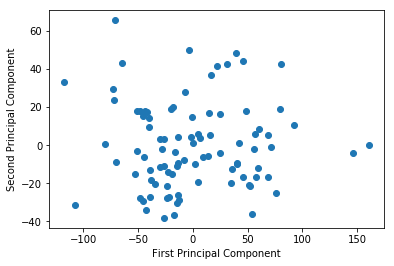

In [69]:
pca = PCA(n_components=8)
pca.fit(X_test)
reduced_data_test = pca.transform(X_test)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [70]:
pipe_svc = Pipeline([('std_scl', StandardScaler()), 
                    ('pca', PCA(n_components=8)),
                    ('svc', SVC(random_state=1))])

pipe_svc.fit(X_train,y_train)

print('Test Accuracy: %.3f' % pipe_svc.score(X_test,y_test))

Test Accuracy: 0.857


C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid thi

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid thi

Cross validation scores: [0.68181818 0.77272727 0.68181818 0.77272727 0.86363636 0.9047619
 0.80952381 0.9        0.8        0.95      ]


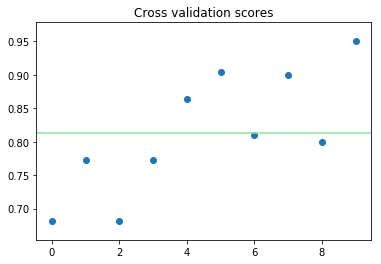

In [71]:
##Cross Validation:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_svc,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=1)

print('Cross validation scores: %s' % scores)

import matplotlib.pyplot as plt
plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g') # Mean value of cross validation scores
plt.show()

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid thi

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packa

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standar

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = 

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standar

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standar

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standar

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packa

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standar

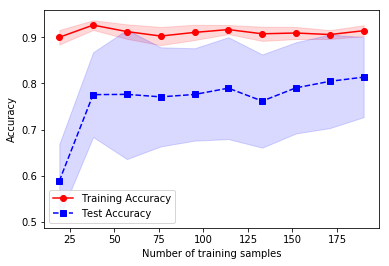

In [72]:
##Learning Curve:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_svc,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10)

# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)

# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid thi

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standar

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standar

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = 

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standar

C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ibney naseem\Anaconda3_1\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standar

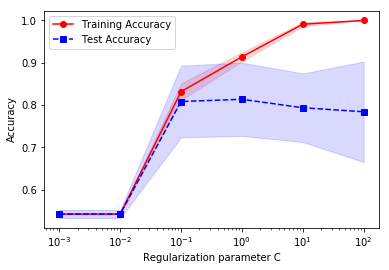

In [73]:
##Validation Curve:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_svc,
                                             X=X_train,
                                             y=y_train,
                                             param_name='svc__C',
                                             param_range=param_range,
                                             cv=10)

# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)

# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(param_range, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(param_range,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(param_range, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(param_range,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xscale('log')
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [74]:
auc(fpr, tpr)

0.8333333333333334

In [75]:
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance

In [76]:
import pdpbox
from pdpbox import pdp, info_plots #for partial plots

# The Explanation
Now let's see what the model gives us from the ML explainability tools.

Permutation importance is the first tool for understanding a machine-learning model, and involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy. Learn more here.

Let's take a look,

In [77]:
perm = PermutationImportance(rfc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0484 ± 0.0453,thalassemia
0.0440 ± 0.0461,No.of_major_vessels
0.0198 ± 0.0448,Chest_pain_type
0.0154 ± 0.0298,Sex
0.0088 ± 0.0164,Exercise_induced_angina
0.0000 ± 0.0461,Oldpeak
0.0000 ± 0.0311,Age
0 ± 0.0000,Fasting_blood_sugar(mg/dl)
0 ± 0.0000,Serum_cholestoral(mg/dl)
-0.0022 ± 0.0088,Resting_ECG_results


So, it looks like the most important factors in terms of permutation is a thalessemia result of 'reversable defect'. The high importance of 'max heart rate achieved' type makes sense, as this is the immediate, subjective state of the patient at the time of examination (as opposed to, say, age, which is a much more general factor).

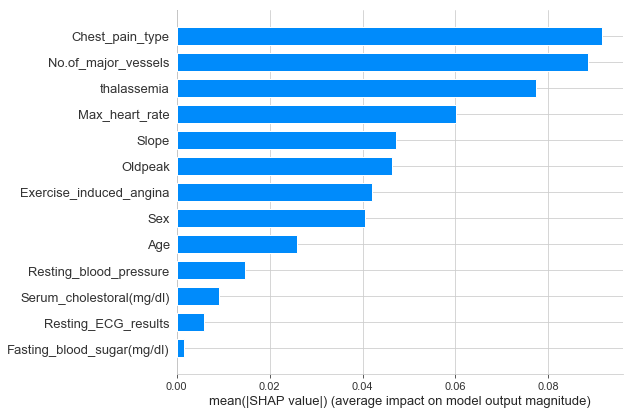

In [79]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

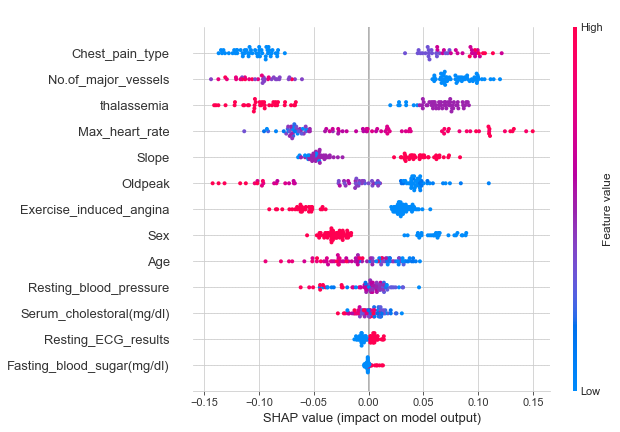

In [80]:

#To see shap values:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="dot")

The number of major vessels division is pretty clear, and it's saying that low values are bad (blue on the right). The thalassemia 'reversable defect' division is very clear (yes = red = good, no = blue = bad).

You can see some clear separation in many of the other variables. Exercise induced angina has a clear separation, although not as expected, as 'no' (blue) increases the probability. Another clear one is the st_slope. It looks like when it's flat, that's a bad sign (red on the right).

It's also odd is that the men (red) have a reduced chance of heart disease in this model. Why is this? Domain knowledge tells us that men have a greater chance.

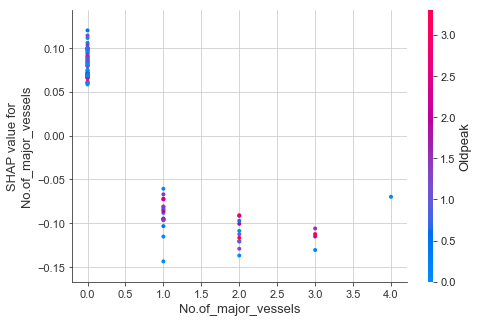

In [81]:
shap.dependence_plot('No.of_major_vessels', shap_values[1], X_test, interaction_index="Oldpeak")

You can see the stark effect on the number of major vessels, but there doesn't seem to be a lot to take from the colour Oldpeak.

The final plot, for me, is one of the most effective. It shows the predictions and influencing factors for many (in this case 50) patients, all together. It's also interactive, which is great. Hover over to see why each person ended up either red (prediction of disease) or blue (prediction of no disease).

Next, let's pick out individual patients and see how the different variables are affecting their outcomes.

In [82]:
def heart_disease_risk_factors(rfc, patient):

    explainer = shap.TreeExplainer(rfc)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [83]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(rfc, data_for_prediction)

For this person, their prediction is 0.18% (compared to a baseline of 54.4%). Many things are working in their favour, including having a No.of_major_vessel,chest_pain_type, and not having a Max_heart_rate.

Let's check another,

In [84]:
data_for_prediction = X_test.iloc[3,:].astype(float)
heart_disease_risk_factors(rfc, data_for_prediction)

For this person, their prediction is 11% (compared to a baseline of 54.4%). Not working in their favour are things like having no major vessels, chest_pain_type, and thalassemia defect.

We can also plot something called 'SHAP dependence contribution plots' (learn more here), which are pretty self-explanatory in the context of SHAP values.

# XG BOOST:

In [91]:
import xgboost as xgb

In [92]:
xgb_classifier = xgb.XGBClassifier()

In [94]:
xgb_param_grid = {
    'n_estimators': range(1,20),
    'max_depth': range(1, 10),
    'learning_rate': [.1,.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1],
    'booster':["gbtree"],
     'min_child_weight': [0.001,0.003,0.01],
}

In [95]:
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = xgb_classifier, scoring = "accuracy", 
                                    verbose = 0, n_iter = 100, cv = 4)

In [98]:
xgb_random.fit(X_test,y_test)

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': range(1, 20), 'max_depth': range(1, 10), 'learning_rate': [0.1, 0.4, 0.45, 0.5, 0.55, 0.6], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1], 'booster': ['gbtree'], 'min_child_weight': [0.001, 0.003, 0.01]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [99]:
xgb_bp = xgb_random.best_params_

In [100]:
xgb_model=xgb.XGBClassifier(n_estimators=xgb_bp["n_estimators"],
                            min_child_weight=xgb_bp["min_child_weight"],
                            max_depth=xgb_bp["max_depth"],
                            learning_rate=xgb_bp["learning_rate"],
                            colsample_bytree=xgb_bp["colsample_bytree"],
                            booster=xgb_bp["booster"])

In [101]:
xgb_model.fit(X_test,y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.45, max_delta_step=0,
       max_depth=1, min_child_weight=0.001, missing=None, n_estimators=17,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

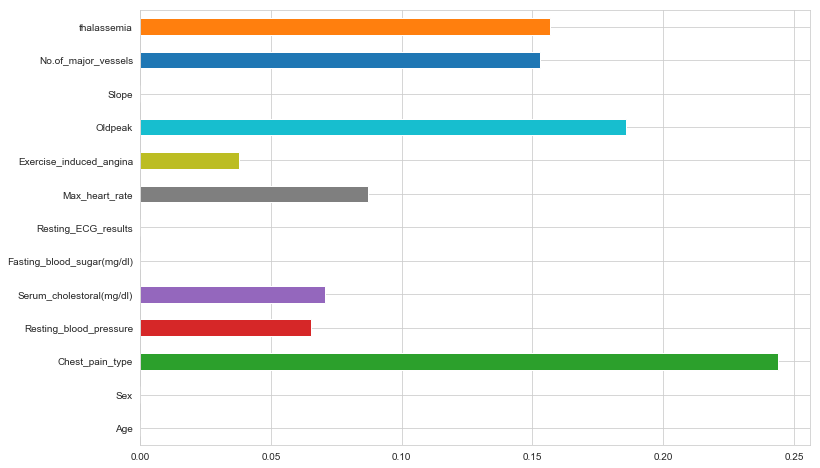

In [107]:
importances_xgb=pd.Series(xgb_model.feature_importances_, index=X_train.columns)
importances_xgb.plot(kind='barh', figsize=(12,8))

# Conclusion:
This dataset is old and small by today's standards. However, it's allowed us to create a simple model and then use various machine learning explainability tools and techniques to peek inside. At the start, I hypothesised, using (Googled) domain knowledge that factors such as cholesterol and age would be major factors in the model. This dataset didn't show that. Instead, the number of major factors and aspects of ECG results dominated. I actually feel like I've learnt a thing or two about heart disease!

I suspect this sort of approach will become increasingly important as machine learning has a greater and greater role in health care.